In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import missingno as msno

In [2]:
ROOT = '../'

In [3]:
df = pd.read_csv(ROOT + 'dataset/data.csv')
#drop last column
df = df.iloc[:, :-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_all_features = df.iloc[:,1:].copy()
features_name= list(df_all_features.columns)[1:]
df_all_features.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

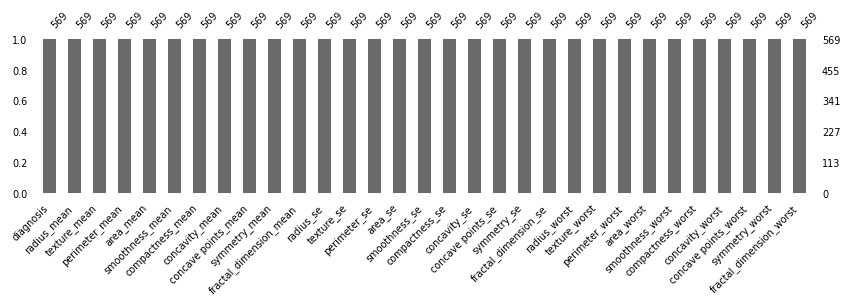

In [5]:
msno.bar(df_all_features,figsize = (10,2),fontsize =7)

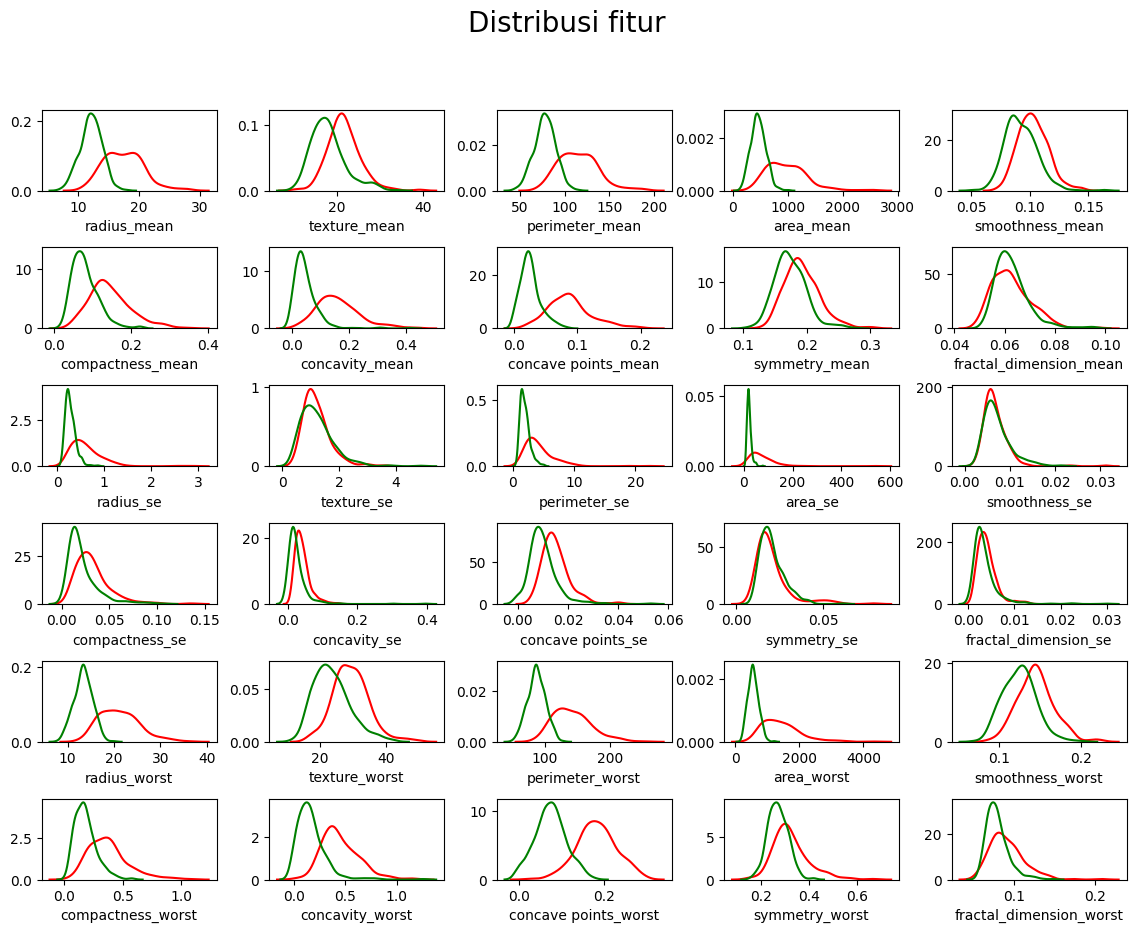

In [5]:
# Plot KDE Berdasarkan Target
import matplotlib.pyplot as plt
import seaborn as sns
def plot_kde(data,start,end,row_num,col_num,title,target ):
    df_set_pos = data[data[target] == "M"].drop(target,axis = 1)
    df_set_neg = data[data[target] == "B"].drop(target,axis = 1)
    df_set_pos = df_set_pos.iloc[:,start:end+1]
    df_set_neg = df_set_neg.iloc[:,start:end +1]
    #plot numerical data (Classification Task)
    numerical = df_set_pos.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(row_num,col_num,figsize = (14,10))
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    fig.suptitle(title,fontsize = 20)
    row = 0
    cols = 0

    for item in numerical:
        if cols > col_num -1:
            cols = 0
            row += 1
        ax1 = sns.kdeplot(x = item,data = df_set_pos,ax = axes[row,cols],color = "red" ,label = "Malignant")
        ax2 = sns.kdeplot(x = item,data = df_set_neg,ax = axes[row,cols],color = "green" ,label = "Benign")
        #ax1.legend()
        ax1.set_ylabel("")
        ax2.set_ylabel("")
        cols += 1

plot_kde(df_all_features,0,30,6,5,'Distribusi fitur',"diagnosis")

In [7]:
#plot distribution of features
numerical = df_mean_features.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(5,2,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.2)
row = 0
cols = 0

for item in numerical:
    if cols > 1:
        cols = 0
        row += 1
    ax = sns.histplot(x=item,data=df_mean_features ,ax=axes[row, cols],bins = 20)
    ax.set_ylabel("")
    cols += 1

NameError: name 'df_mean_features' is not defined

In [74]:
# sns.heatmap(df[all_features_name].corr(method="pearson"),cmap = "bwr" ,vmin = -1,vmax=1,annot = True,cbar = False,fmt = ".2f")

In [6]:
def correlation(dataset, threshold):
    df_corr = dataset.corr(method="pearson")
    columns = np.full((df_corr.shape[0],), True, dtype=bool)
    for i in range(df_corr.shape[0]):
        for j in range(i+1, df_corr.shape[0]):
            if df_corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = df_corr.columns[columns]
    return list(selected_columns)
uncorr_features = correlation(df[features_name],0.9)
print(uncorr_features)
print(len(uncorr_features))

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']
20


Text(0.5, 0, 'Diagnosis')

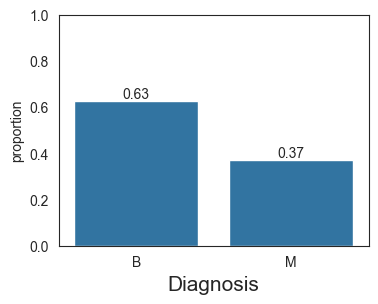

In [7]:
#plot distribution of diagnosis
df_proportion = df_all_features.diagnosis.value_counts(normalize=True).to_frame().reset_index()
plt.figure(figsize = (4,3))
sns.set_style("white")
sns.barplot(x = "diagnosis",y = "proportion",data = df_proportion)
#add data labels
for i in range(df_proportion.shape[0]):
    count = df_proportion.iloc[i,1]
    plt.text(i,count+0.01,round(count,2),ha = "center")
plt.ylim(0,1)
plt.xlabel("Diagnosis",fontsize = 15)

In [8]:
## stratified shuffle
X = df_all_features.drop(columns="diagnosis")[uncorr_features]
y = df_all_features["diagnosis"]
#replace M and B with 1 and 0
y = y.replace({"M":1,"B":0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 20), (143, 20), (426,), (143,))

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
   ("numerical",num_pipe,uncorr_features)
],remainder = "drop",verbose_feature_names_out=False)

In [10]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

array([[-0.7457497 , -0.22189399, -0.17745016, ..., -0.92705039,
        -0.2651798 , -1.06401285],
       [ 1.80931999, -0.47891277, -0.10709539, ...,  0.68324977,
        -0.34586005, -0.74583427],
       [-0.65070334, -0.1074038 , -0.50763   , ..., -0.60941466,
        -0.58948278, -0.22039148],
       ...,
       [-0.32642754,  1.33891103, -0.85731414, ..., -1.10224297,
        -0.95175295, -1.17380687],
       [ 0.00903019,  0.26410518, -0.46583508, ..., -0.10879573,
        -0.59106475, -0.29601491],
       [ 1.71706912,  1.78986218,  0.27881101, ...,  0.50483515,
         0.38500814, -0.21703043]])

In [11]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier


df_model = pd.DataFrame(columns = ["model","set_data","score"])
set_data = ["test","cross_val"]
models = {
        #"KNN" : KNeighborsClassifier(),
        "SVM":SVC(),
        #"Random Forest":RandomForestClassifier(random_state = 42,n_jobs = -1),
        #"Logistic Regression" : LogisticRegression(random_state = 42), 
        "LGBM" : LGBMClassifier(random_state = 42,verbosity = -1),
 #       "XGB" : XGBClassifier(random_state = 42) 
        }

scorer = "accuracy"
num_cv = 3
cv = RepeatedStratifiedKFold(n_splits = num_cv,n_repeats = 5,random_state = 42)

for m in models:
    pipeline = Pipeline([  
    ('prep', preprocessor), 
    ('algo', models[m])
])
    spot_check = cross_val_score(pipeline,X_train,y_train,cv = cv,scoring = scorer,n_jobs= -1 )
    spot_check = spot_check.mean()
    model = pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    model_list = [m] * 2
    tes = pd.DataFrame(list(zip(model_list,set_data,[score,spot_check])),columns = ["model","set_data","score"])
    df_model = pd.concat([df_model,tes],ignore_index = True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_20732\1924538164.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_model = pd.concat([df_model,tes],ignore_index = True)


In [12]:
df_model

,model,set_data,score
0,SVM,test,0.979021
1,SVM,cross_val,0.954930
2,LGBM,test,0.951049
3,LGBM,cross_val,0.951643


## KNN

In [13]:
from sklearn.metrics import classification_report
import optuna 
def tuning_model(objective,pipeline,n_trial = 100):
    study = optuna.create_study(direction="maximize",sampler=optuna.samplers.RandomSampler(seed=42))
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=n_trial,show_progress_bar=True,)
    best_params = study.best_params
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    train_score = pipeline.score(X_train, y_train)
    valid_score = study.best_value
    y_pred = pipeline.predict(X_test)
    print("best params:", best_params)
    print("train score:", train_score)
    print("test score:", test_score)
    print("valid score:", valid_score)
    print(classification_report(y_test, y_pred))
    return pipeline,study

d:\conda\envs\breast-cancer\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [94]:
pipeline_knn = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

def objective_knn(trial):
    n_neighbors = trial.suggest_int("algo__n_neighbors", 1, 25)
    p = trial.suggest_int("algo__p", 1, 2)
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    pipeline_knn.set_params(algo=model)
    return cross_val_score(pipeline_knn, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_knn = tuning_model(objective_knn,pipeline_knn)

[I 2023-09-05 09:11:17,801] A new study created in memory with name: no-name-e640ab3f-a335-4d62-b96a-4247612954c3


  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_neighbors': 5, 'algo__p': 2}
train score: 0.9736263736263736
test score: 0.9473684210526315
valid score: 0.9498867201115372
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [95]:
#save pipeline_knn 
import pickle
pickle.dump(pipeline_knn, open(ROOT + 'model/model_full_uncor/model_knn.pkl', 'wb'))

## SVM

In [19]:
pipeline_svm = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC())
])

def objective_svm(trial):
    C = trial.suggest_float("algo__C", 1e-5, 1e5,log = True)
    #gamma = trial.suggest_categorical("algo__gamma", ["scale", "auto"])
    kernel = trial.suggest_categorical("algo__kernel", ["rbf", "poly", "sigmoid"])
    model = SVC(C=C, kernel=kernel, probability=True)
    pipeline_svm.set_params(algo=model)
    return cross_val_score(pipeline_svm, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_svm,study_svm = tuning_model(objective_svm,pipeline_svm)

Best trial: 80. Best value: 0.96385: 100%|██████████| 100/100 [00:33<00:00,  2.98it/s]

best params: {'algo__C': 3.1064663032928306, 'algo__kernel': 'rbf'}
train score: 0.9859154929577465
test score: 0.9790209790209791
valid score: 0.963849765258216
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [29]:
#get history of optuna
import optuna.visualization as vis
#set plotly theme to white
import plotly.io as pio
pio.templates.default = "plotly_white"
#set figure width
fig = optuna.visualization.plot_optimization_history(study_svm)
fig.update_layout(width = 800)
#remove legends and title
fig.update_layout(showlegend=False, title_text="")
#set y axis title to "Accuracy"
fig.update_yaxes(title_text="Accuracy")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.8929577464788733, 0.6267605633802819, 0.8807511737089203,
                    0.944600938967136, 0.6267605633802819, 0.8755868544600939,
                    0.9492957746478875, 0.9300469483568075, 0.6267605633802819,
                    0.6643192488262912, 0.6267605633802819, 0.6267605633802819,
                    0.8779342723004696, 0.8751173708920188, 0.6267605633802819,
                    0.7450704225352112, 0.6267605633802819, 0.6267605633802819,
                    0.6267605633802819, 0.9323943661971832, 0.944600938967136,
                    0.6657276995305165, 0.8779342723004696, 0.9314553990610328,
                    0.9605633802816901, 0.6267605633802819, 0.8769953051643193,
                    0.6399061032863851, 0.8769953051643193, 0.9314553990610328,
                    0.944600938967136, 0.6267605633802819, 0.6267605633802819,
                    0.6267605633802819, 0.8981220657276995, 0.9323943661971832,
                    0.6553990610328639, 0.6267605633802819, 0.6267605633802819,
                    0.9474178403755869, 0.7061032863849767, 0.6267605633802819,
                    0.6267605633802819, 0.8633802816901409, 0.9394366197183099,
                    0.6854460093896714, 0.6450704225352113, 0.895774647887324,
                    0.944600938967136, 0.944600938967136, 0.8807511737089203,
                    0.8798122065727699, 0.6267605633802819, 0.9417840375586856,
                    0.8004694835680752, 0.9507042253521126, 0.6488262910798123,
                    0.9323943661971832, 0.8859154929577464, 0.6549295774647889,
                    0.944600938967136, 0.6267605633802819, 0.944600938967136,
                    0.8774647887323944, 0.944600938967136, 0.9582159624413148,
                    0.944600938967136, 0.8957746478873239, 0.944600938967136,
                    0.8769953051643193, 0.9323943661971832, 0.8868544600938967,
                    0.6267605633802819, 0.8774647887323944, 0.9323943661971832,
                    0.6267605633802819, 0.944600938967136, 0.931924882629108,
                    0.6267605633802819, 0.9248826291079811, 0.963849765258216,
                    0.944600938967136, 0.9300469483568076, 0.6267605633802819,
                    0.944600938967136, 0.9530516431924883, 0.7539906103286388,
                    0.9084507042253521, 0.8779342723004696, 0.6267605633802819,
                    0.9122065727699531, 0.9323943661971832, 0.631924882629108,
                    0.6267605633802819, 0.931924882629108, 0.6267605633802819,
                    0.944600938967136, 0.9300469483568075, 0.9056338028169013,
                    0.8784037558685447]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.8929577464788733, 0.8929577464788733,

In [35]:
#optuna show history to dataframe
history_svm = study_svm.trials_dataframe()

#filter only step 0,3,6,24,80
history_svm = history_svm[history_svm["number"].isin([0,3,6,24,80])]
history_svm

,number,value,datetime_start,datetime_complete,duration,params_algo__C,params_algo__kernel,state
0,0,0.892958,2023-10-09 22:27:05.294592,2023-10-09 22:27:05.961761,0 days 00:00:00.667169,0.055642,rbf,COMPLETE
3,3,0.944601,2023-10-09 22:27:06.523158,2023-10-09 22:27:06.756441,0 days 00:00:00.233283,2110.699504,rbf,COMPLETE
6,6,0.949296,2023-10-09 22:27:07.272119,2023-10-09 22:27:07.519575,0 days 00:00:00.247456,0.363664,rbf,COMPLETE
24,24,0.960563,2023-10-09 22:27:11.967372,2023-10-09 22:27:12.214641,0 days 00:00:00.247269,1.687828,rbf,COMPLETE
80,80,0.963850,2023-10-09 22:27:28.782096,2023-10-09 22:27:29.251775,0 days 00:00:00.469679,3.106466,rbf,COMPLETE


In [ ]:
import pickle
pickle.dump(pipeline_svm, open(ROOT + 'model/model_full_uncor/model_svm.pkl', 'wb'))

## Random Forest

In [99]:
## Random Forest
pipeline_rf = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42, n_jobs=-1))
])

def objective_rf(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    min_samples_leaf = trial.suggest_int("algo__min_samples_leaf", 1, 10)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42, n_jobs=-1)
    pipeline_rf.set_params(algo=model)
    return cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_rf = tuning_model(objective_rf,pipeline_rf)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 900, 'algo__max_depth': 9, 'algo__min_samples_leaf': 1}
train score: 1.0
test score: 0.9473684210526315
valid score: 0.9516236784013012
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [100]:
import pickle
pickle.dump(pipeline_rf, open(ROOT + 'model/model_full_uncor/model_rf.pkl', 'wb'))

In [101]:
## Logistic Regression
pipeline_lr = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(random_state=42))
])

def objective_lr(trial):
    C = trial.suggest_float("algo__C", 1e-5, 1e5, log=True)
    solver = trial.suggest_categorical("algo__solver", ["newton-cg", "lbfgs", "liblinear", "sag", "saga"])
    model = LogisticRegression(C=C, solver=solver, random_state=42)
    pipeline_lr.set_params(algo=model)
    return cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring=scorer).mean()

pipelien_lr = tuning_model(objective_lr,pipeline_lr)

  0%|          | 0/100 [00:00<?, ?it/s]

d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

best params: {'algo__C': 11.897302909454902, 'algo__solver': 'sag'}
train score: 0.9868131868131869
test score: 0.9736842105263158
valid score: 0.9736203090507725
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [102]:
import pickle
pickle.dump(pipeline_lr, open(ROOT + 'model/model_full_uncor/model_lr.pkl', 'wb'))

In [103]:
## XGBoost
pipeline_xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(random_state=42, n_jobs=-1))
])

def objective(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    learning_rate = trial.suggest_float("algo__learning_rate", 1e-5, 1e-1, log=True)
    gamma = trial.suggest_float("algo__gamma", 1e-5, 1e-1, log=True)
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, gamma=gamma, random_state=42, n_jobs=-1)
    pipeline_xgb.set_params(algo=model)
    return cross_val_score(pipeline_xgb, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_xgb = tuning_model(objective,pipeline_xgb)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 800, 'algo__max_depth': 9, 'algo__learning_rate': 0.09162638829638212, 'algo__gamma': 0.0004471679901231305}
train score: 1.0
test score: 0.9473684210526315
valid score: 0.9621993726036948
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [105]:
import pickle
pickle.dump(pipeline_xgb, open(ROOT + 'model/model_full_uncor/model_xgb.pkl', 'wb'))

In [15]:
pipeline_lgbm = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(random_state=42,verbose = -1))
])

def objective(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 500, 2000, step=100)
    max_bin = trial.suggest_int("algo__max_bin", 256, 1024)
    learning_rate = trial.suggest_float("algo__learning_rate", 1e-5, 1e-2, log=True)


    num_leaves = trial.suggest_int("algo__num_leaves", 2, 256)
    model = LGBMClassifier(verbose = -1,n_estimators=n_estimators, max_bin=max_bin,num_leaves=num_leaves, learning_rate=learning_rate, random_state=42)
    pipeline_lgbm.set_params(algo=model)
    return cross_val_score(pipeline_lgbm, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_lgbm,study_lgbm = tuning_model(objective,pipeline_lgbm)

Best trial: 91. Best value: 0.953052: 100%|██████████| 100/100 [09:35<00:00,  5.75s/it]


best params: {'algo__n_estimators': 2000, 'algo__max_bin': 552, 'algo__learning_rate': 0.007648419348470311, 'algo__num_leaves': 232}
train score: 1.0
test score: 0.958041958041958
valid score: 0.9530516431924883
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        90
           1       1.00      0.89      0.94        53

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



In [17]:
#get history of optuna
import optuna.visualization as vis
optuna.visualization.plot_optimization_history(study_lgbm)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.932394366197183, 0.6267605633802819, 0.6267605633802819,
                    0.6267605633802819, 0.6267605633802819, 0.6267605633802819,
                    0.6267605633802819, 0.9145539906103285, 0.9497652582159624,
                    0.9206572769953051, 0.6267605633802819, 0.6267605633802819,
                    0.9507042253521126, 0.9262910798122067, 0.6267605633802819,
                    0.944600938967136, 0.6267605633802819, 0.9262910798122067,
                    0.9051643192488263, 0.6267605633802819, 0.6267605633802819,
                    0.9295774647887324, 0.6267605633802819, 0.9450704225352112,
                    0.6267605633802819, 0.6267605633802819, 0.8765258215962441,
                    0.6267605633802819, 0.9309859154929578, 0.9492957746478872,
                    0.6267605633802819, 0.9361502347417839, 0.6267605633802819,
                    0.9483568075117372, 0.6267605633802819, 0.9023474178403758,
                    0.9009389671361504, 0.94037558685446, 0.952112676056338,
                    0.6267605633802819, 0.9089201877934272, 0.6267605633802819,
                    0.8901408450704226, 0.9248826291079812, 0.9507042253521125,
                    0.9511737089201877, 0.9394366197183097, 0.6267605633802819,
                    0.6267605633802819, 0.9497652582159624, 0.6267605633802819,
                    0.6267605633802819, 0.6272300469483569, 0.9380281690140847,
                    0.9131455399061033, 0.6267605633802819, 0.9507042253521125,
                    0.9497652582159624, 0.6267605633802819, 0.9084507042253521,
                    0.9511737089201876, 0.6267605633802819, 0.6267605633802819,
                    0.6267605633802819, 0.9178403755868543, 0.6267605633802819,
                    0.9375586854460093, 0.9408450704225352, 0.9023474178403758,
                    0.9370892018779344, 0.8427230046948357, 0.8779342723004695,
                    0.6267605633802819, 0.6267605633802819, 0.9262910798122067,
                    0.6267605633802819, 0.8976525821596246, 0.8779342723004695,
                    0.9338028169014084, 0.6267605633802819, 0.9262910798122067,
                    0.9145539906103285, 0.6267605633802819, 0.6267605633802819,
                    0.8854460093896713, 0.6267605633802819, 0.9131455399061033,
                    0.8765258215962441, 0.6267605633802819, 0.9431924882629107,
                    0.8455399061032866, 0.9530516431924883, 0.6267605633802819,
                    0.6267605633802819, 0.9497652582159624, 0.8849765258215961,
                    0.6267605633802819, 0.9511737089201877, 0.6267605633802819,
                    0.9422535211267605]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.932394366197183, 0.9323

In [36]:
#optuna show history to dataframe
history_lgbm = study_lgbm.trials_dataframe()

#filter only step 0,3,6,24,80
history_lgbm = history_lgbm[history_lgbm["number"].isin([0,8,12,38,91])]
history_lgbm

,number,value,datetime_start,datetime_complete,duration,params_algo__learning_rate,params_algo__max_bin,params_algo__n_estimators,params_algo__num_leaves,state
0,0,0.932394,2023-10-09 22:15:02.191481,2023-10-09 22:15:06.069822,0 days 00:00:03.878341,0.001570,987,1000,154,COMPLETE
8,8,0.949765,2023-10-09 22:15:34.128243,2023-10-09 22:15:36.781471,0 days 00:00:02.653228,0.007887,985,600,208,COMPLETE
12,12,0.950704,2023-10-09 22:15:45.885495,2023-10-09 22:15:52.055989,0 days 00:00:06.170494,0.008105,398,1300,199,COMPLETE
38,38,0.952113,2023-10-09 22:17:45.392384,2023-10-09 22:17:48.459198,0 days 00:00:03.066814,0.009056,632,700,63,COMPLETE
91,91,0.953052,2023-10-09 22:22:13.980682,2023-10-09 22:22:58.777468,0 days 00:00:44.796786,0.007648,552,2000,232,COMPLETE


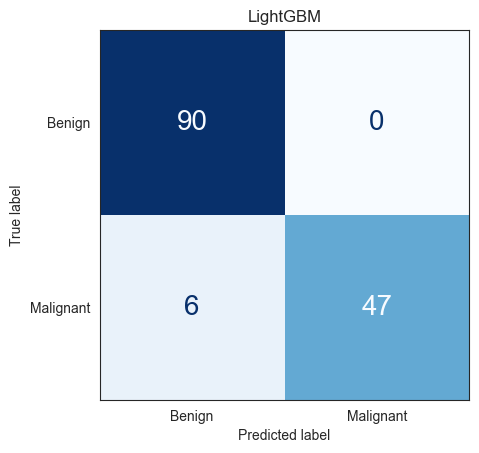

In [60]:
#confusion matrix on pipeline_lgbm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = pipeline_lgbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
#set cmap to "Blues", and label 0 to benign and 1 to malignant
cm_display = cm_display.plot(cmap="Blues", xticks_rotation="horizontal")
cm_display.ax_.set_xticklabels(["Benign", "Malignant"])
cm_display.ax_.set_yticklabels(["Benign", "Malignant"])
#hide colorbar
cm_display.im_.colorbar.remove()
#set title to "LightGBM"
cm_display.ax_.set_title("LightGBM")
#set fontsize in each cell to 20
for text in cm_display.text_.ravel():
    text.set_fontsize(20)

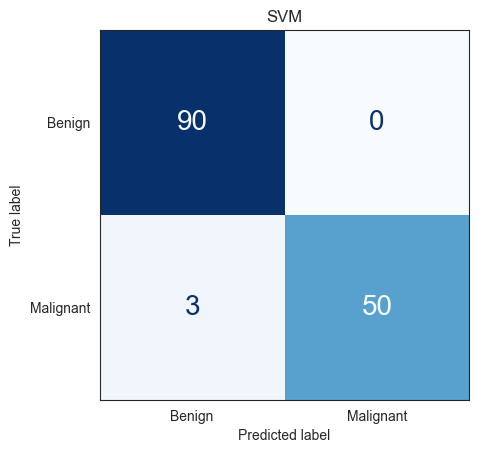

In [61]:
#confusion matrix on pipeline_lgbm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = pipeline_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
#set cmap to "Blues", and label 0 to benign and 1 to malignant
cm_display = cm_display.plot(cmap="Blues", xticks_rotation="horizontal")
cm_display.ax_.set_xticklabels(["Benign", "Malignant"])
cm_display.ax_.set_yticklabels(["Benign", "Malignant"])
#hide colorbar
cm_display.im_.colorbar.remove()
#set title to "LightGBM"
cm_display.ax_.set_title("SVM")
#set fontsize in each cell to 20
for text in cm_display.text_.ravel():
    text.set_fontsize(20)

In [70]:
print(classification_report(y_test, y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.9677    1.0000    0.9836        90
           1     1.0000    0.9434    0.9709        53

    accuracy                         0.9790       143
   macro avg     0.9839    0.9717    0.9772       143
weighted avg     0.9797    0.9790    0.9789       143



In [71]:
print(classification_report(y_test,pipeline_lgbm.predict(X_test),digits = 4))

              precision    recall  f1-score   support

           0     0.9375    1.0000    0.9677        90
           1     1.0000    0.8868    0.9400        53

    accuracy                         0.9580       143
   macro avg     0.9688    0.9434    0.9539       143
weighted avg     0.9607    0.9580    0.9575       143



In [18]:
import pickle
pickle.dump(pipeline_lgbm, open(ROOT + 'model/model_full_uncor/model_lgbm.pkl', 'wb'))

In [66]:
from sklearn.ensemble import VotingClassifier

estimators = [
   # ("SVM_base" , SVC(probability = True)),
    ("SVM_tune" , SVC(C = 3.1065,probability = True)),
   # ("LGBM_base" , LGBMClassifier()),
    ("LGBM_tune" , LGBMClassifier(learning_rate=0.007579479953348005, max_bin = 552, n_estimators=2000,num_leaves=232,random_state = 42,verbose = -1))
]
clf = VotingClassifier(
     estimators=estimators,voting = 'soft',weights = [0.5,0.5])

pipeline_stacking = Pipeline([  
    ('prep', preprocessor), 
    ('algo', clf)
])
pipeline_stacking.fit(X_train,y_train)
cross_val_score(pipeline_stacking, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_stacking.score(X_test,y_test)

0.972027972027972

0.9824561403508771

In [54]:
print(classification_report(pipeline_stacking.predict(X_test),y_test),for)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.95      1.00      0.98        40

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
pipeline_lgbm.named_steps['algo']

LGBMClassifier(learning_rate=0.07579479953348005, max_depth=1, n_estimators=800,
               random_state=42)

In [ ]:
svm_params = C=3.3042156796273123, gamma='auto', probability=True